In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## User data -kaggle

In [11]:
import os
import numpy as np
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/BOAZ/mini_pj2/data/Loan.csv")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [12]:
# data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from sklearn.utils import resample
df = pd.read_csv("/content/gdrive/MyDrive/BOAZ/mini_pj2/data/Loan.csv") # 데이터 불러오기
df = df.drop('ApplicationDate',axis=1)
# 20~30대만 필터링 (20 <= Age <= 39)
df = df[(df['Age'] >= 20) & (df['Age'] <= 39)]

# 1. 각 클래스별 데이터 분리
approved_df = df[df['LoanApproved'] == 1]
not_approved_df = df[df['LoanApproved'] == 0]

# 2. 소수 클래스 수에 맞춰 다운샘플링
min_count = min(len(approved_df), len(not_approved_df))

approved_downsampled = resample(approved_df,
                                replace=False,  # 복원 추출 여부
                                n_samples=min_count,  # 소수 클래스 샘플 수
                                random_state=42)

not_approved_downsampled = resample(not_approved_df,
                                    replace=False,
                                    n_samples=min_count,
                                    random_state=42)

# 3. 다운샘플링된 데이터 합치기
balanced_df = pd.concat([approved_downsampled, not_approved_downsampled])

# 4. 데이터 섞기 (선택 사항)
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


# 1. LoanApproved 변수를 범주형으로 변환
df['LoanApproved'] = df['LoanApproved'].map({1: 'Approved', 0: 'NotApproved'})


df_transformed = df.copy()  # 원본을 복사하여 변환 데이터프레임 생성

# 수치형 데이터를 범주형 데이터로 변환
numeric_columns = df_transformed.select_dtypes(include=['int64', 'float64']).columns

# 각 수치형 컬럼에 대해 그룹 나누기
for col in numeric_columns:
    # 해당 컬럼의 데이터를 오름차순으로 정렬
    sorted_values = np.sort(df_transformed[col].values)

    # 각 컬럼의 길이를 4로 나누어서 인덱스 분배
    group_size = len(sorted_values) // 4

    # 4등분한 구간의 인덱스를 구하고, 해당 구간에 값을 할당
    group_labels = np.concatenate([
        np.full(group_size, '1'),  # 1그룹
        np.full(group_size, '2'),  # 2그룹
        np.full(group_size, '3'),  # 3그룹
        np.full(len(sorted_values) - 3 * group_size, '4')  # 4그룹 (나머지)
    ])

    # 그룹을 다시 변환된 데이터프레임에 할당
    df_transformed[col] = group_labels

# 수치형 변수의 범주화된 컬럼에 대해 원핫 인코딩을 적용
categorical_columns = df_transformed.select_dtypes(include=['object', 'category']).columns
one_hot_df = pd.get_dummies(df_transformed[categorical_columns], prefix_sep='=', drop_first=False)

# 범주형 변수를 원핫인코딩한 후 연관 규칙을 찾음
frequent_itemsets = apriori(one_hot_df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.1,num_itemsets=2)

# support 값으로 내림차순 정렬
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
# 'lift' 값으로 내림차순 정렬
sorted_rules = rules.sort_values(by='lift', ascending=False)

# 결과 출력
print("Frequent Itemsets:")
print(sorted_frequent_itemsets)

print("\nAssociation Rules:")
print(sorted_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
     support                                           itemsets
0   0.853771                        (EmploymentStatus=Employed)
2   0.502591                            (MaritalStatus=Married)
6   0.500000                            (LoanApproved=Approved)
7   0.500000                         (LoanApproved=NotApproved)
8   0.428900  (MaritalStatus=Married, EmploymentStatus=Emplo...
10  0.427461  (LoanApproved=Approved, EmploymentStatus=Emplo...
11  0.426310  (EmploymentStatus=Employed, LoanApproved=NotAp...
4   0.398964                     (HomeOwnershipStatus=Mortgage)
9   0.342545  (HomeOwnershipStatus=Mortgage, EmploymentStatu...
1   0.317789                          (EducationLevel=Bachelor)
3   0.315486                             (MaritalStatus=Single)
5   0.311457                                 (LoanPurpose=Home)

Association Rules:
                      antecedents                     consequents  \
2  (HomeOwnershipStatus=Mortgage)     (EmploymentStatus=Empl

In [34]:
# 문자열로 변환(유/무 변수임)
df[['BankruptcyHistory','PreviousLoanDefaults']] = df[['BankruptcyHistory','PreviousLoanDefaults']].astype(str)

# 필터링된 데이터 확인
print(f"필터링 후 데이터 개수: {len(df)}")
df.head()

필터링 후 데이터 개수: 3474


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,31,37019,629,Employed,Associate,8,35642,108,Married,3,...,3084.916667,0.873135,2,8764,0.266142,0.271090,884.404247,0.376478,NotApproved,52.0
1,37,116188,564,Employed,Master,13,25360,12,Divorced,2,...,9682.333333,0.898521,4,23562,0.208360,0.166688,2308.968380,0.315623,Approved,44.0
2,32,140693,550,Employed,Bachelor,10,20151,72,Married,3,...,11724.416667,0.764826,2,16133,0.260151,0.249715,542.458313,0.070064,Approved,44.8
3,31,35729,587,Unemployed,Master,8,37193,36,Single,3,...,2977.416667,0.920229,6,4426,0.228693,0.228503,1436.830727,0.561840,NotApproved,59.0
4,37,66498,541,Employed,Master,15,19238,120,Married,3,...,5541.500000,0.712179,5,36429,0.303738,0.251823,440.125754,0.216571,Approved,40.0


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         3474 non-null   int64  
 1   AnnualIncome                3474 non-null   int64  
 2   CreditScore                 3474 non-null   int64  
 3   EmploymentStatus            3474 non-null   object 
 4   EducationLevel              3474 non-null   object 
 5   Experience                  3474 non-null   int64  
 6   LoanAmount                  3474 non-null   int64  
 7   LoanDuration                3474 non-null   int64  
 8   MaritalStatus               3474 non-null   object 
 9   NumberOfDependents          3474 non-null   int64  
 10  HomeOwnershipStatus         3474 non-null   object 
 11  MonthlyDebtPayments         3474 non-null   int64  
 12  CreditCardUtilizationRate   3474 non-null   float64
 13  NumberOfOpenCreditLines     3474 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* 범주형 변수

In [36]:
# 범주형 변수의 고유값 확인
# 범주형 변수 선택
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# 각 범주형 변수의 unique한 값 출력
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 30)


Column: EmploymentStatus
['Employed' 'Unemployed' 'Self-Employed']
------------------------------
Column: EducationLevel
['Associate' 'Master' 'Bachelor' 'Doctorate' 'High School']
------------------------------
Column: MaritalStatus
['Married' 'Divorced' 'Single' 'Widowed']
------------------------------
Column: HomeOwnershipStatus
['Rent' 'Mortgage' 'Other' 'Own']
------------------------------
Column: BankruptcyHistory
['0' '1']
------------------------------
Column: LoanPurpose
['Debt Consolidation' 'Home' 'Auto' 'Education' 'Other']
------------------------------
Column: PreviousLoanDefaults
['0' '1']
------------------------------
Column: LoanApproved
['NotApproved' 'Approved']
------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# 범주형 변수 선택
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# 각 범주형 변수의 고유값과 빈도수 출력
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)


Column: EmploymentStatus
EmploymentStatus
Employed         2966
Self-Employed     288
Unemployed        220
Name: count, dtype: int64
------------------------------
Column: EducationLevel
EducationLevel
Bachelor       1104
High School     846
Associate       695
Master          594
Doctorate       235
Name: count, dtype: int64
------------------------------
Column: MaritalStatus
MaritalStatus
Married     1746
Single      1096
Divorced     478
Widowed      154
Name: count, dtype: int64
------------------------------
Column: HomeOwnershipStatus
HomeOwnershipStatus
Mortgage    1386
Rent        1040
Own          720
Other        328
Name: count, dtype: int64
------------------------------
Column: BankruptcyHistory
BankruptcyHistory
0    3324
1     150
Name: count, dtype: int64
------------------------------
Column: LoanPurpose
LoanPurpose
Home                  1082
Debt Consolidation     880
Auto                   685
Education              505
Other                  322
Name: count, dtype

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


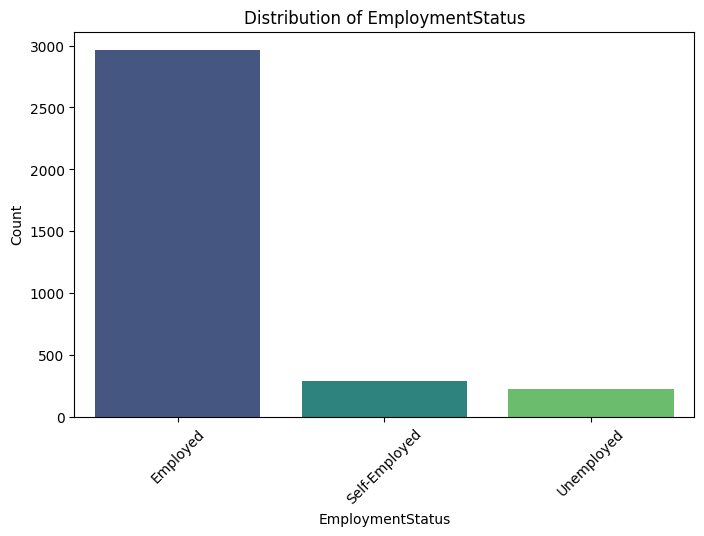

<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


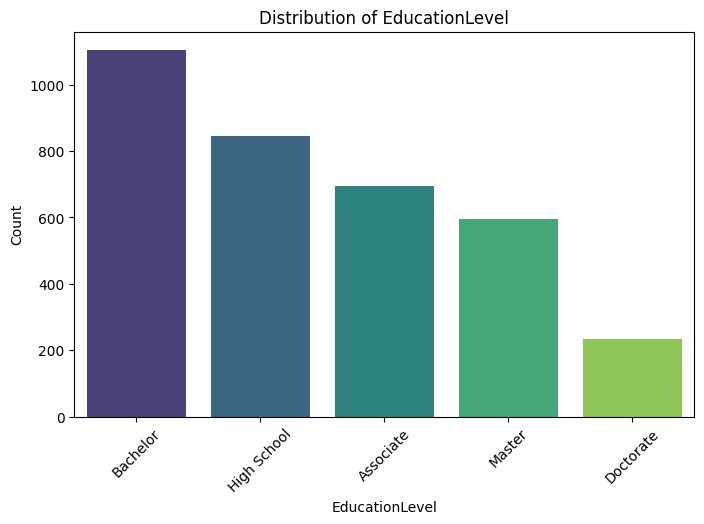

<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


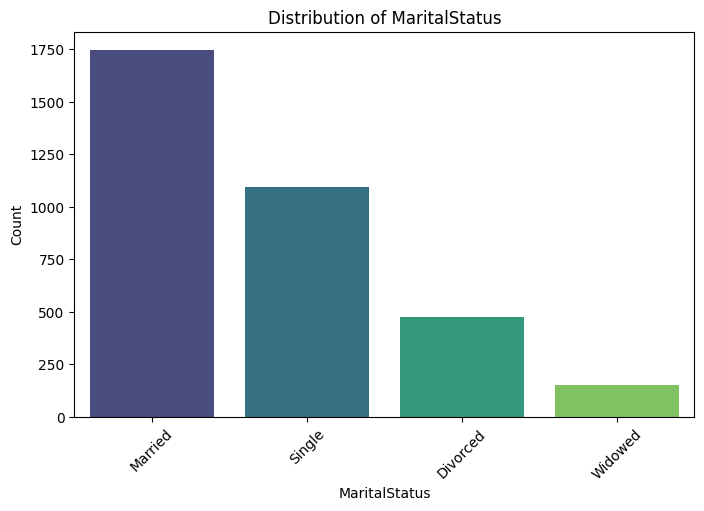

<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


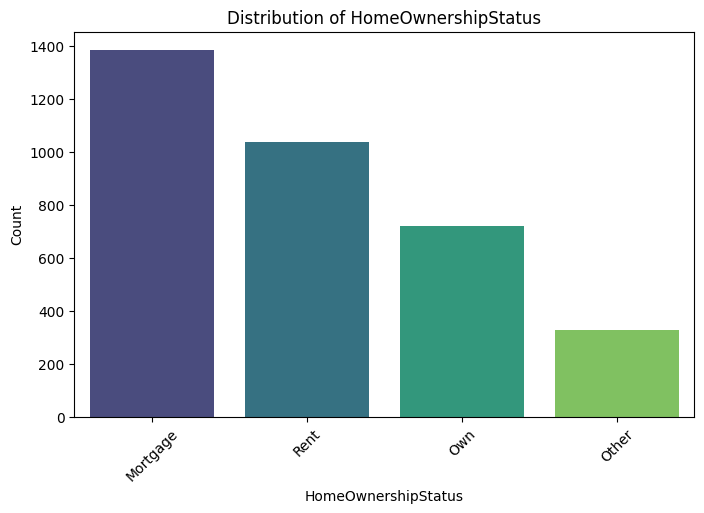

<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


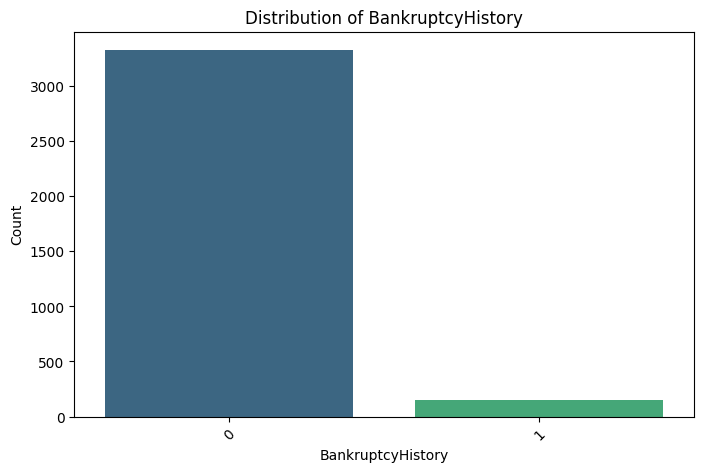

<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


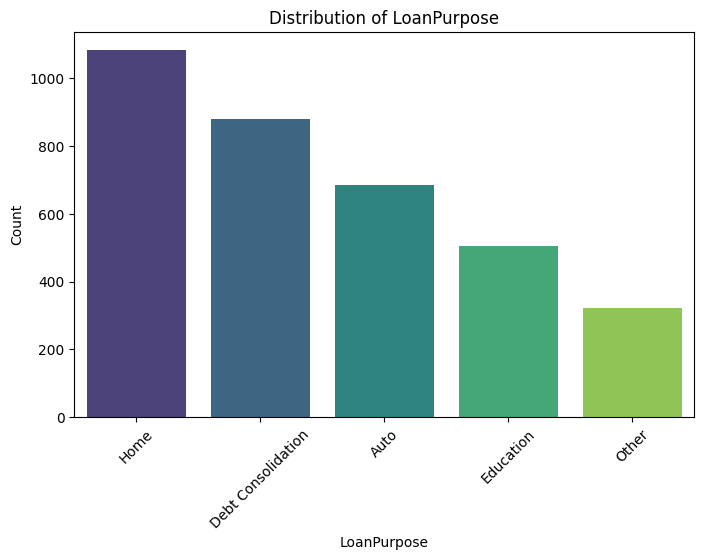

<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


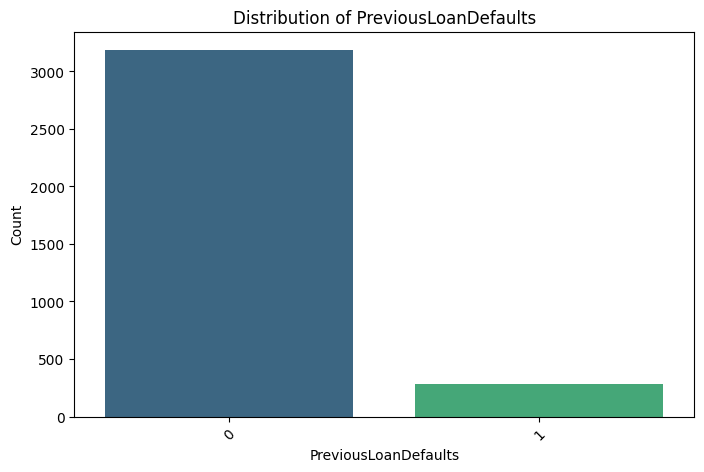

<ipython-input-26-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


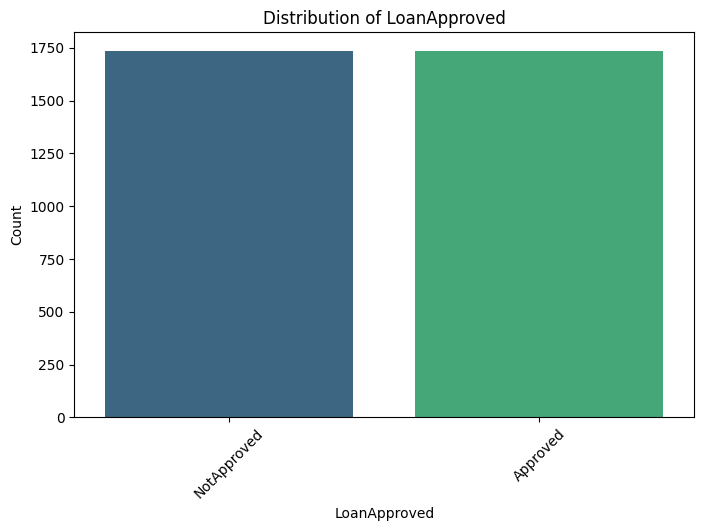

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대그래프 그리기
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Variable: EmploymentStatus
Chi2: 35.245798511071605, p-value: 2.220609012941904e-08
------------------------------
Variable: EducationLevel
Chi2: 192.8299411579418, p-value: 1.3065800068822054e-40
------------------------------
Variable: MaritalStatus
Chi2: 1.5640737724847307, p-value: 0.6675630015931471
------------------------------
Variable: HomeOwnershipStatus
Chi2: 8.311380083331303, p-value: 0.03999622881394247
------------------------------
Variable: BankruptcyHistory
Chi2: 35.123212996389896, p-value: 3.094894619736226e-09
------------------------------
Variable: LoanPurpose
Chi2: 6.110092517745102, p-value: 0.19107597340406948
------------------------------
Variable: PreviousLoanDefaults
Chi2: 23.10761160594707, p-value: 1.531831003342298e-06
------------------------------
Variable: LoanApproved
Chi2: 3470.0011514104776, p-value: 0.0
------------------------------


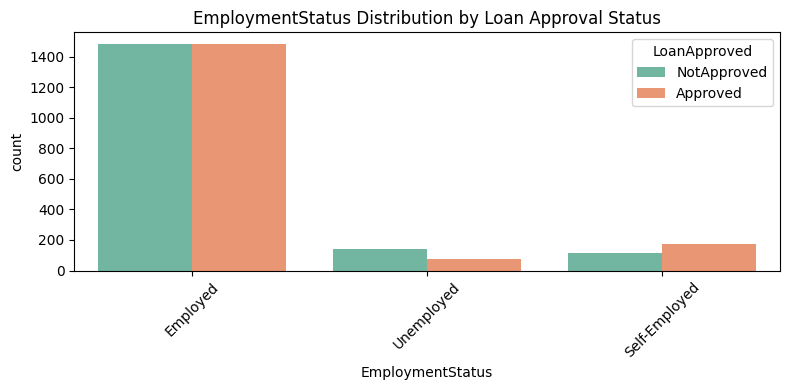

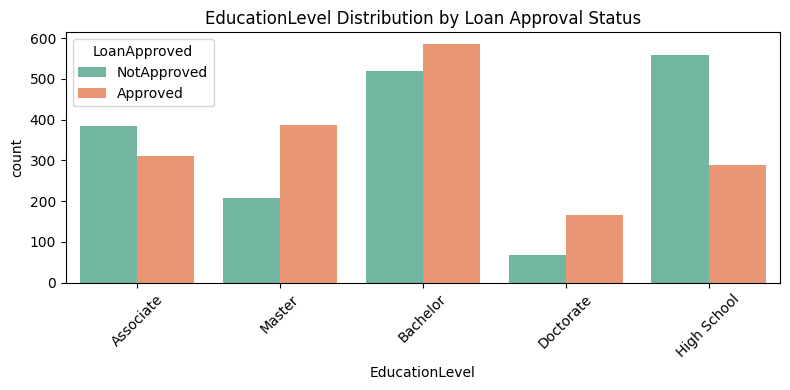

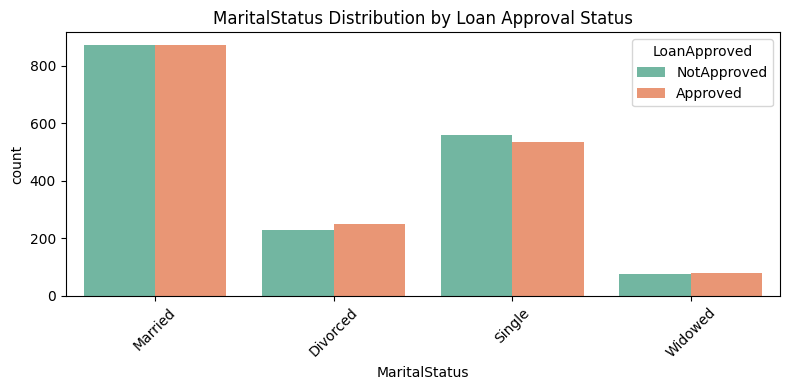

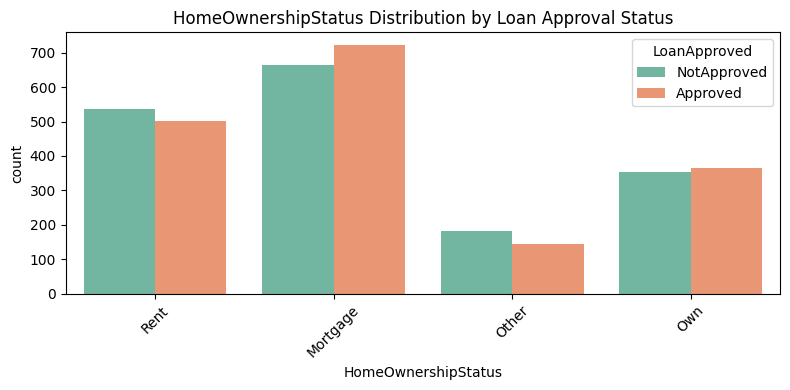

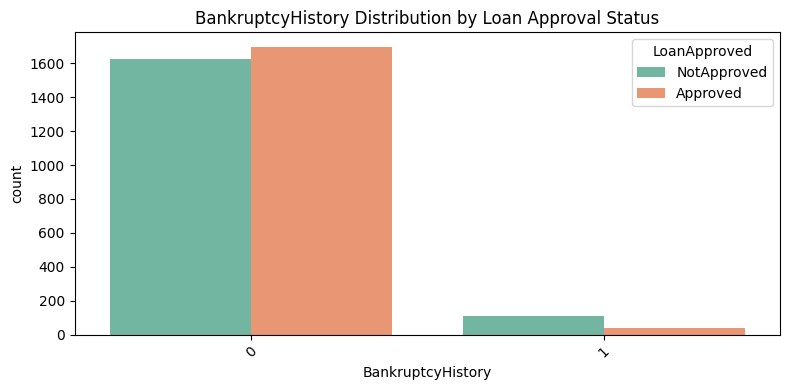

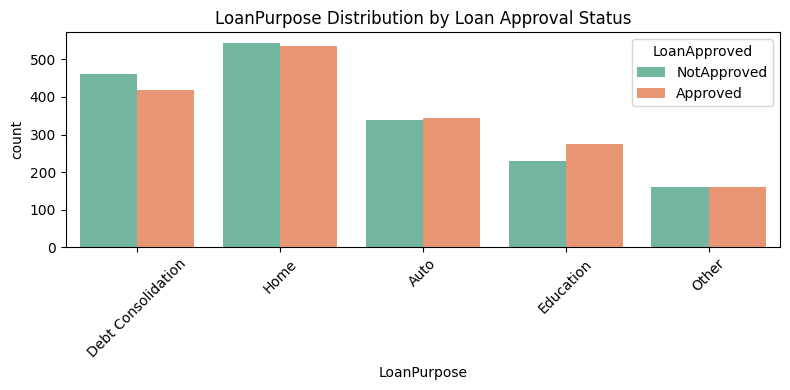

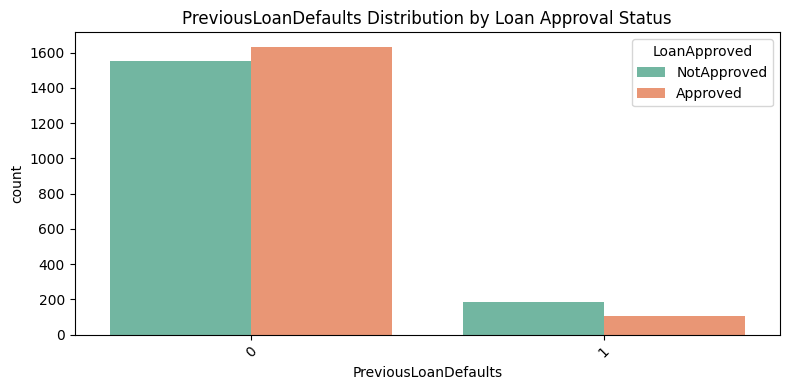

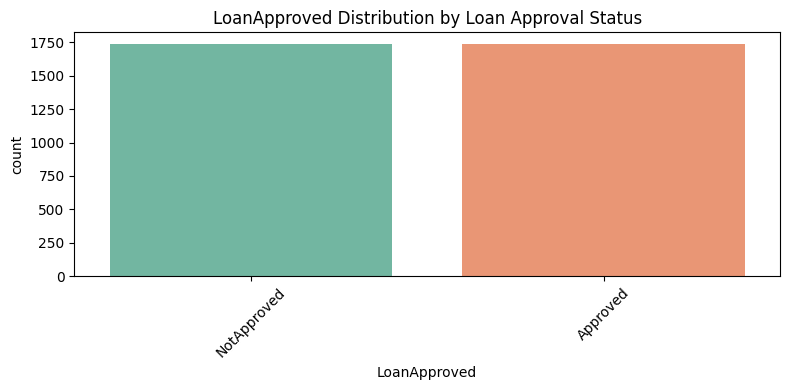

In [38]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수 선택
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Chi-Square Test 결과 저장
chi2_results = []

for col in categorical_columns:
    # 교차표 생성
    crosstab = pd.crosstab(df[col], df['LoanApproved'])

    # Chi-Square Test 실행
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)

    chi2_results.append({'Variable': col, 'Chi2': chi2, 'p-value': p})
    print(f"Variable: {col}")
    print(f"Chi2: {chi2}, p-value: {p}")
    print("-" * 30)

# 결과 DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# 대출 승인 여부별 분포 시각화
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='LoanApproved', palette='Set2')
    plt.title(f'{col} Distribution by Loan Approval Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Normalized Crosstab for EmploymentStatus:
LoanApproved      Approved  NotApproved
EmploymentStatus                       
Employed          0.500674     0.499326
Self-Employed     0.611111     0.388889
Unemployed        0.345455     0.654545



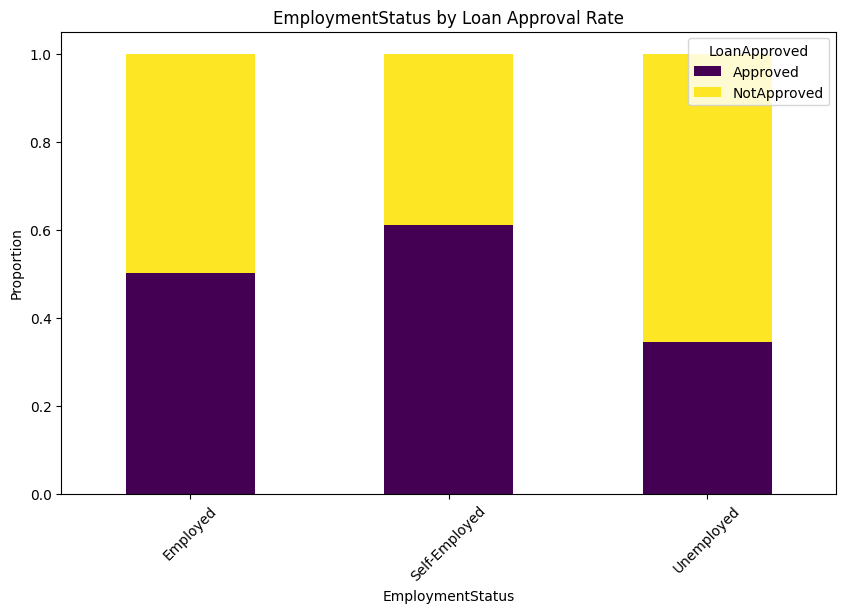

Normalized Crosstab for EducationLevel:
LoanApproved    Approved  NotApproved
EducationLevel                       
Associate       0.447482     0.552518
Bachelor        0.529891     0.470109
Doctorate       0.710638     0.289362
High School     0.340426     0.659574
Master          0.649832     0.350168



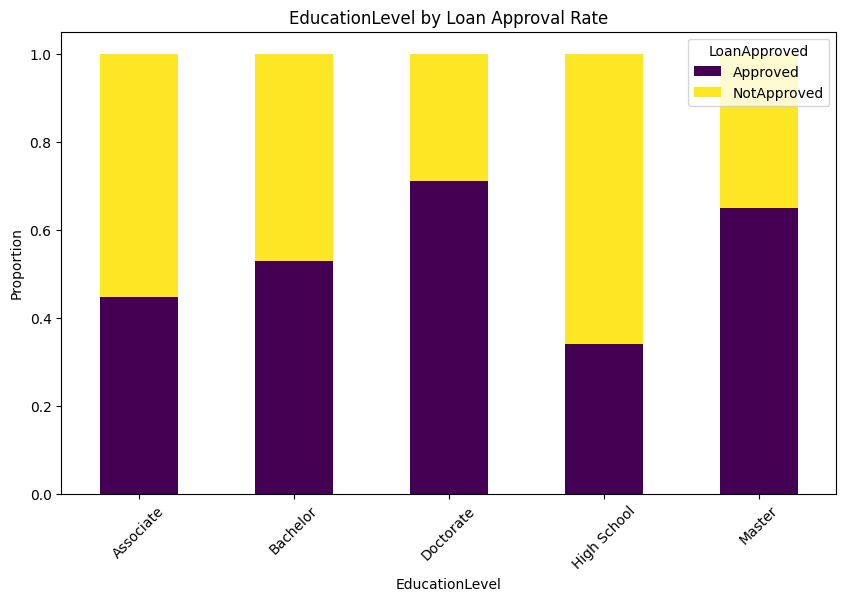

Normalized Crosstab for MaritalStatus:
LoanApproved   Approved  NotApproved
MaritalStatus                       
Divorced       0.523013     0.476987
Married        0.500000     0.500000
Single         0.489051     0.510949
Widowed        0.506494     0.493506



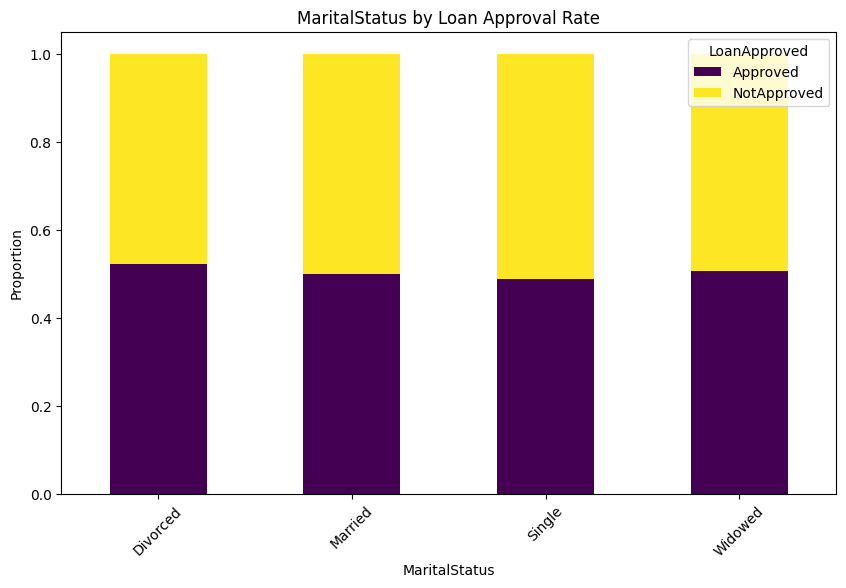

Normalized Crosstab for HomeOwnershipStatus:
LoanApproved         Approved  NotApproved
HomeOwnershipStatus                       
Mortgage             0.521645     0.478355
Other                0.442073     0.557927
Own                  0.508333     0.491667
Rent                 0.483654     0.516346



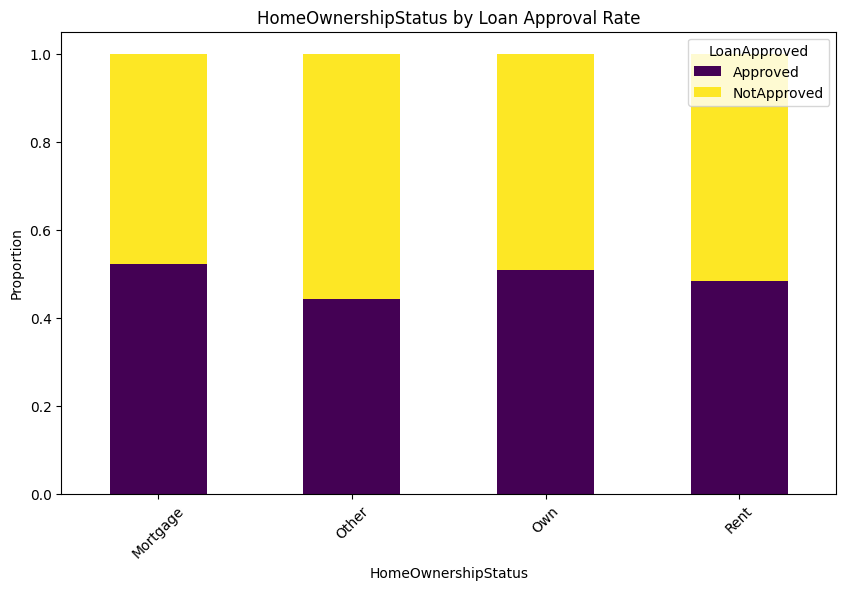

Normalized Crosstab for BankruptcyHistory:
LoanApproved       Approved  NotApproved
BankruptcyHistory                       
0                   0.51083      0.48917
1                   0.26000      0.74000



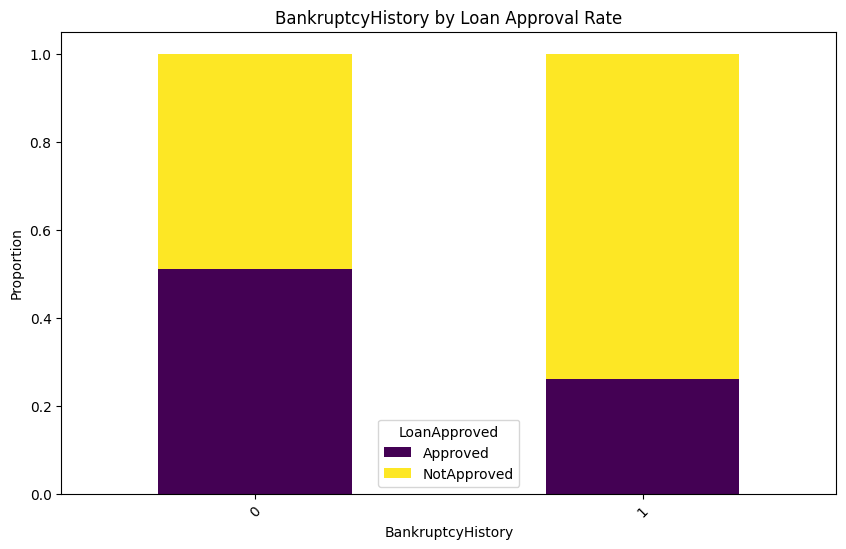

Normalized Crosstab for LoanPurpose:
LoanApproved        Approved  NotApproved
LoanPurpose                              
Auto                0.503650     0.496350
Debt Consolidation  0.476136     0.523864
Education           0.544554     0.455446
Home                0.496303     0.503697
Other               0.500000     0.500000



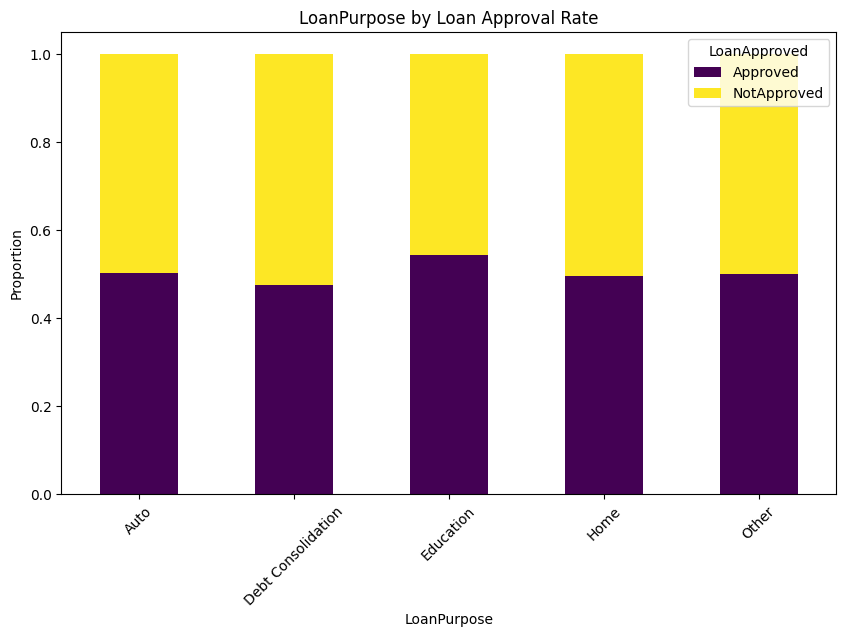

Normalized Crosstab for PreviousLoanDefaults:
LoanApproved          Approved  NotApproved
PreviousLoanDefaults                       
0                     0.512394     0.487606
1                     0.362369     0.637631



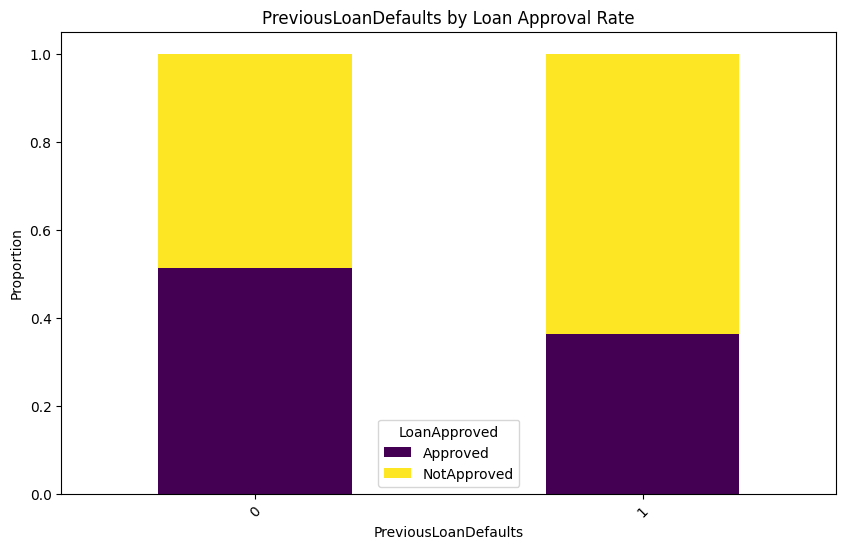

Normalized Crosstab for LoanApproved:
LoanApproved  Approved  NotApproved
LoanApproved                       
Approved           1.0          0.0
NotApproved        0.0          1.0



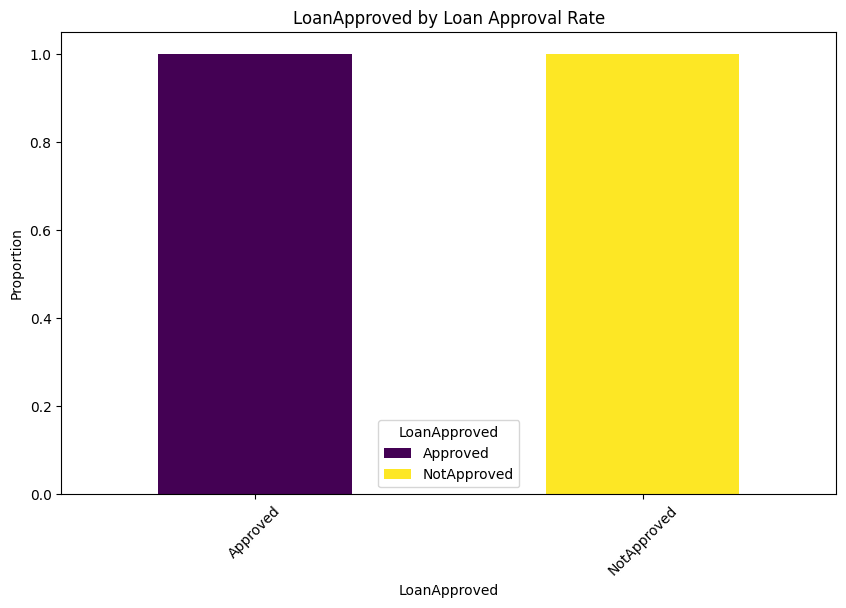

In [42]:
for col in categorical_columns:
    crosstab = pd.crosstab(df[col], df['LoanApproved'], normalize='index')
    print(f"Normalized Crosstab for {col}:\n{crosstab}\n")

    # 시각화
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'{col} by Loan Approval Rate')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

* 수치형 변수

In [28]:
## 수치형 변수
numerical_features = df.columns[(df.dtypes == int).values | (df.dtypes == float).values]
print(len(numerical_features))
numerical_features

27


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'RiskScore'],
      dtype='object')

In [29]:
# 기술 통계량 출력
df[numerical_features].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,...,3474.000000,3474.000000,3474.000000,3474.000000,3.474000e+03,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000
mean,32.009211,71304.924007,564.546344,9.682786,22283.966321,52.480138,1.585780,431.248417,0.286453,3.029649,...,35405.284398,5904.039892,0.799916,5.015256,8.661286e+04,0.238744,0.235498,812.568239,0.320380,47.531894
std,5.130143,46941.516659,48.030005,5.259476,12348.826910,23.356272,1.410231,218.203117,0.160368,1.742901,...,42770.323613,3856.552398,0.121608,2.250648,1.457511e+05,0.033570,0.039936,594.430794,0.298533,8.350579
min,20.000000,15000.000000,343.000000,0.000000,3729.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,576.000000,1250.000000,0.303378,0.000000,1.011000e+03,0.158904,0.138820,107.623980,0.016043,30.400000
25%,28.000000,36757.500000,536.000000,6.000000,13737.250000,36.000000,0.000000,274.000000,0.161025,2.000000,...,11119.750000,3041.770833,0.729448,3.000000,9.343750e+03,0.214885,0.207739,446.411620,0.130990,40.000000
50%,33.000000,60166.500000,572.000000,10.000000,19390.500000,48.000000,1.000000,387.000000,0.266427,3.000000,...,21906.000000,4976.708333,0.823569,5.000000,3.761900e+04,0.235361,0.231184,652.330893,0.221381,47.000000
75%,36.000000,93670.250000,601.000000,14.000000,27653.750000,60.000000,3.000000,539.000000,0.389973,4.000000,...,42701.250000,7753.625000,0.892670,6.000000,1.047572e+05,0.259341,0.260036,979.965589,0.393395,54.000000
max,39.000000,373724.000000,672.000000,21.000000,127945.000000,120.000000,5.000000,1923.000000,0.862205,12.000000,...,441411.000000,25000.000000,0.998618,13.000000,2.603208e+06,0.405029,0.429390,7859.855080,2.502569,84.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


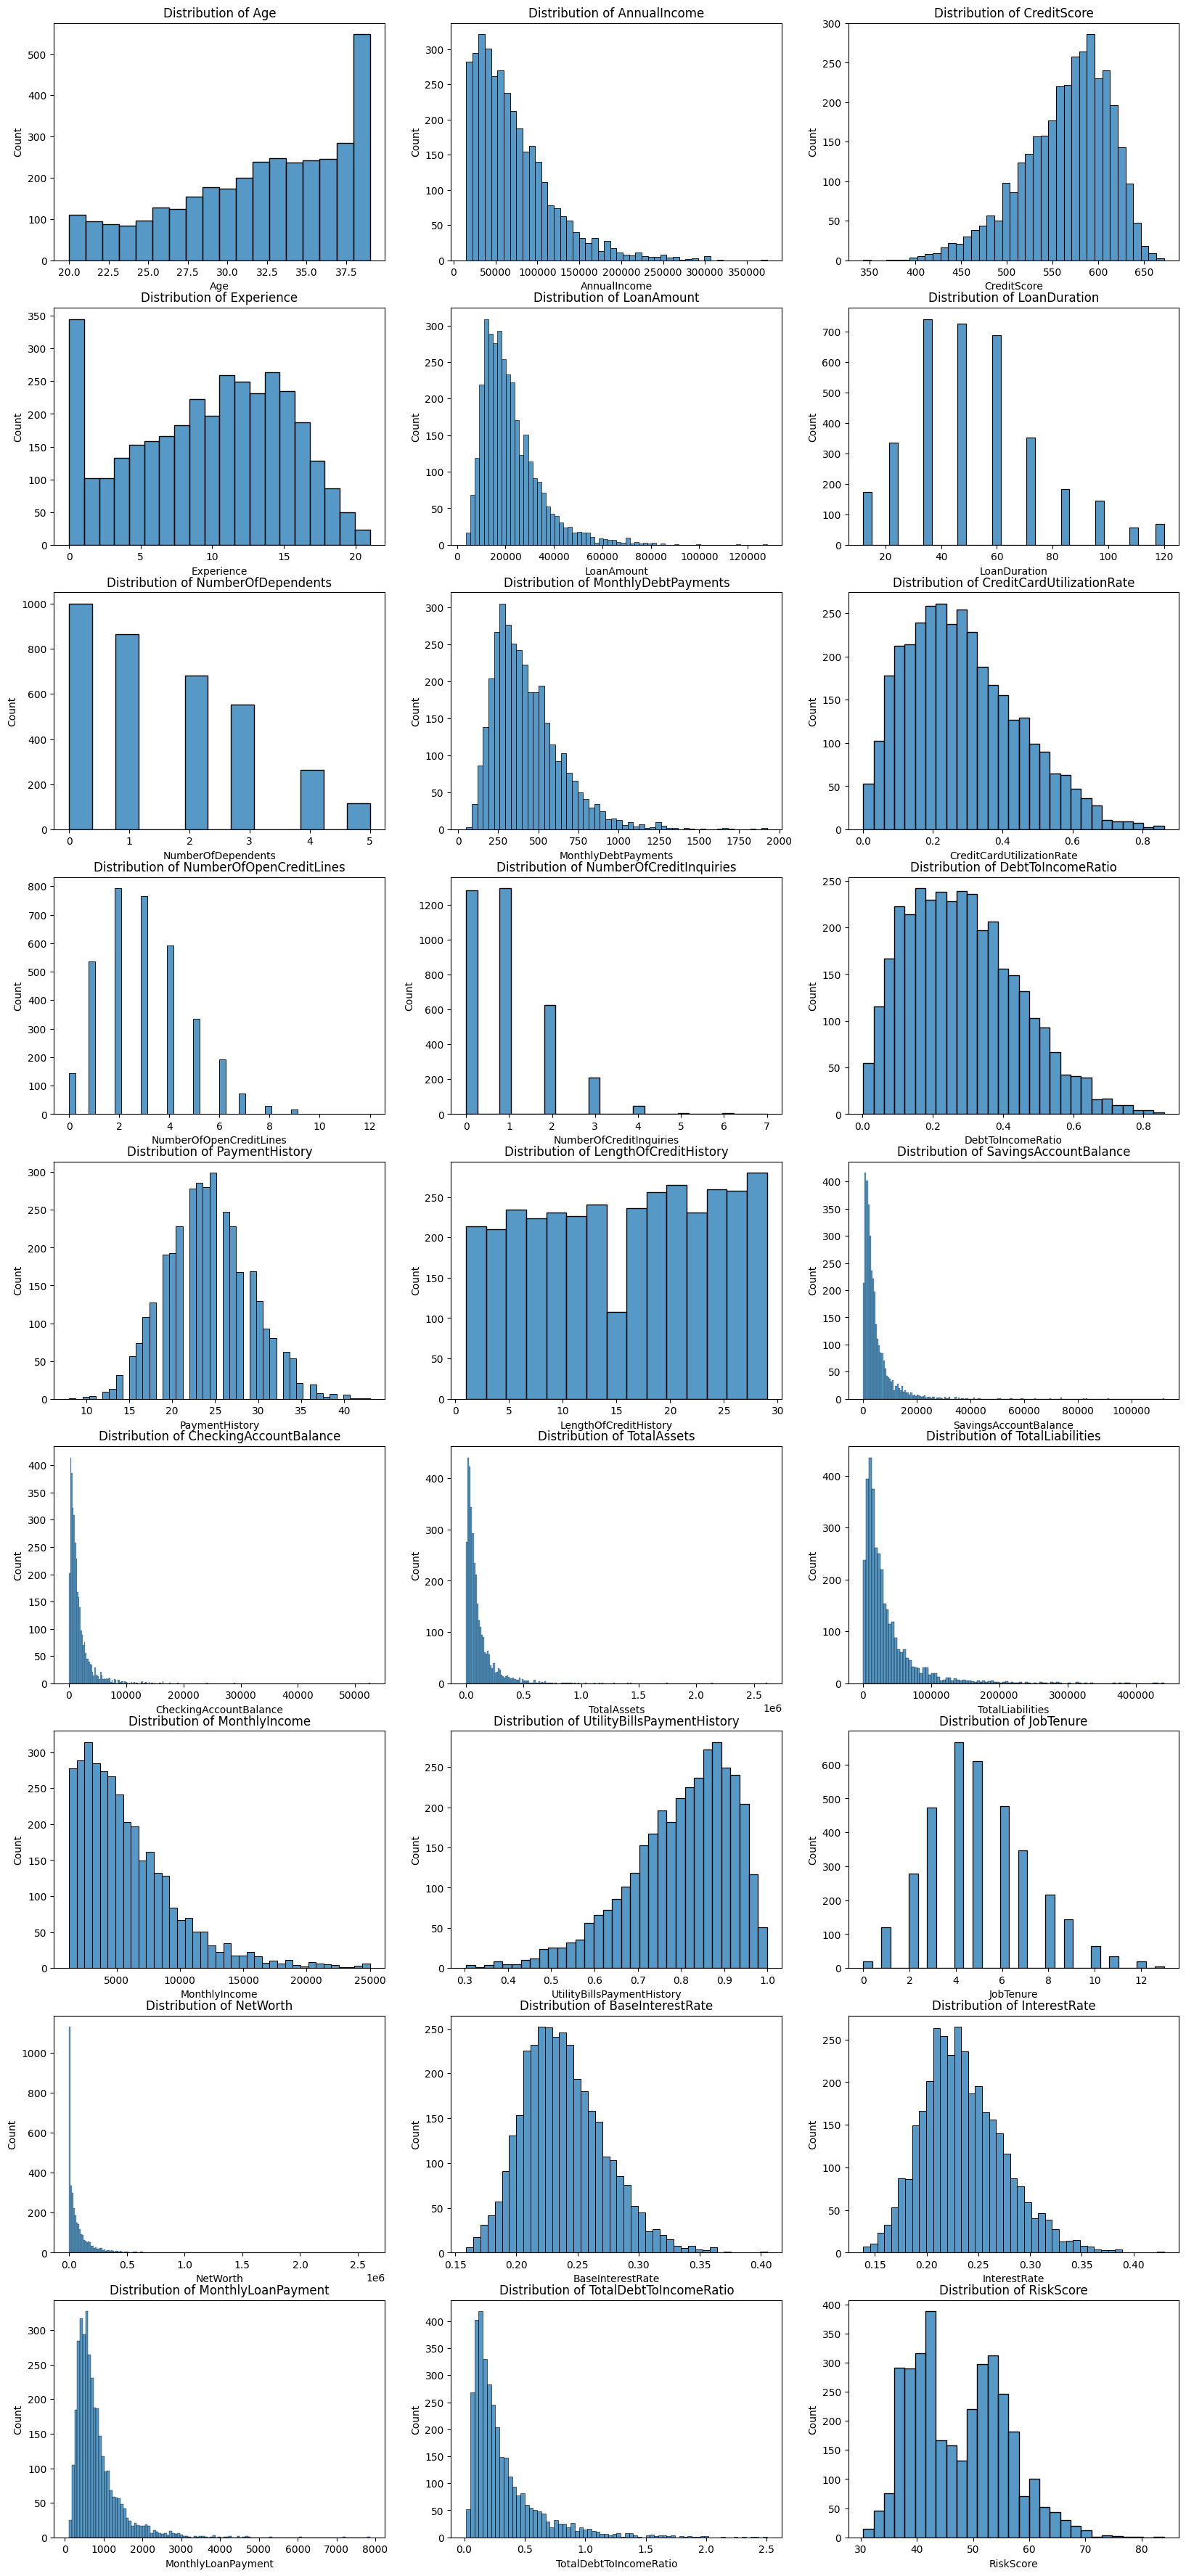

In [30]:
# Number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(numerical_features) + plots_per_row - 1) // plots_per_row

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))

# Iterate through the numerical columns and create the distribution plots
for i, col in enumerate(numerical_features):
  row_idx = i // plots_per_row
  col_idx = i % plots_per_row

  sns.histplot(data=df, x=col, ax=axes[row_idx, col_idx])
  axes[row_idx, col_idx].set_title(f'Distribution of {col}')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


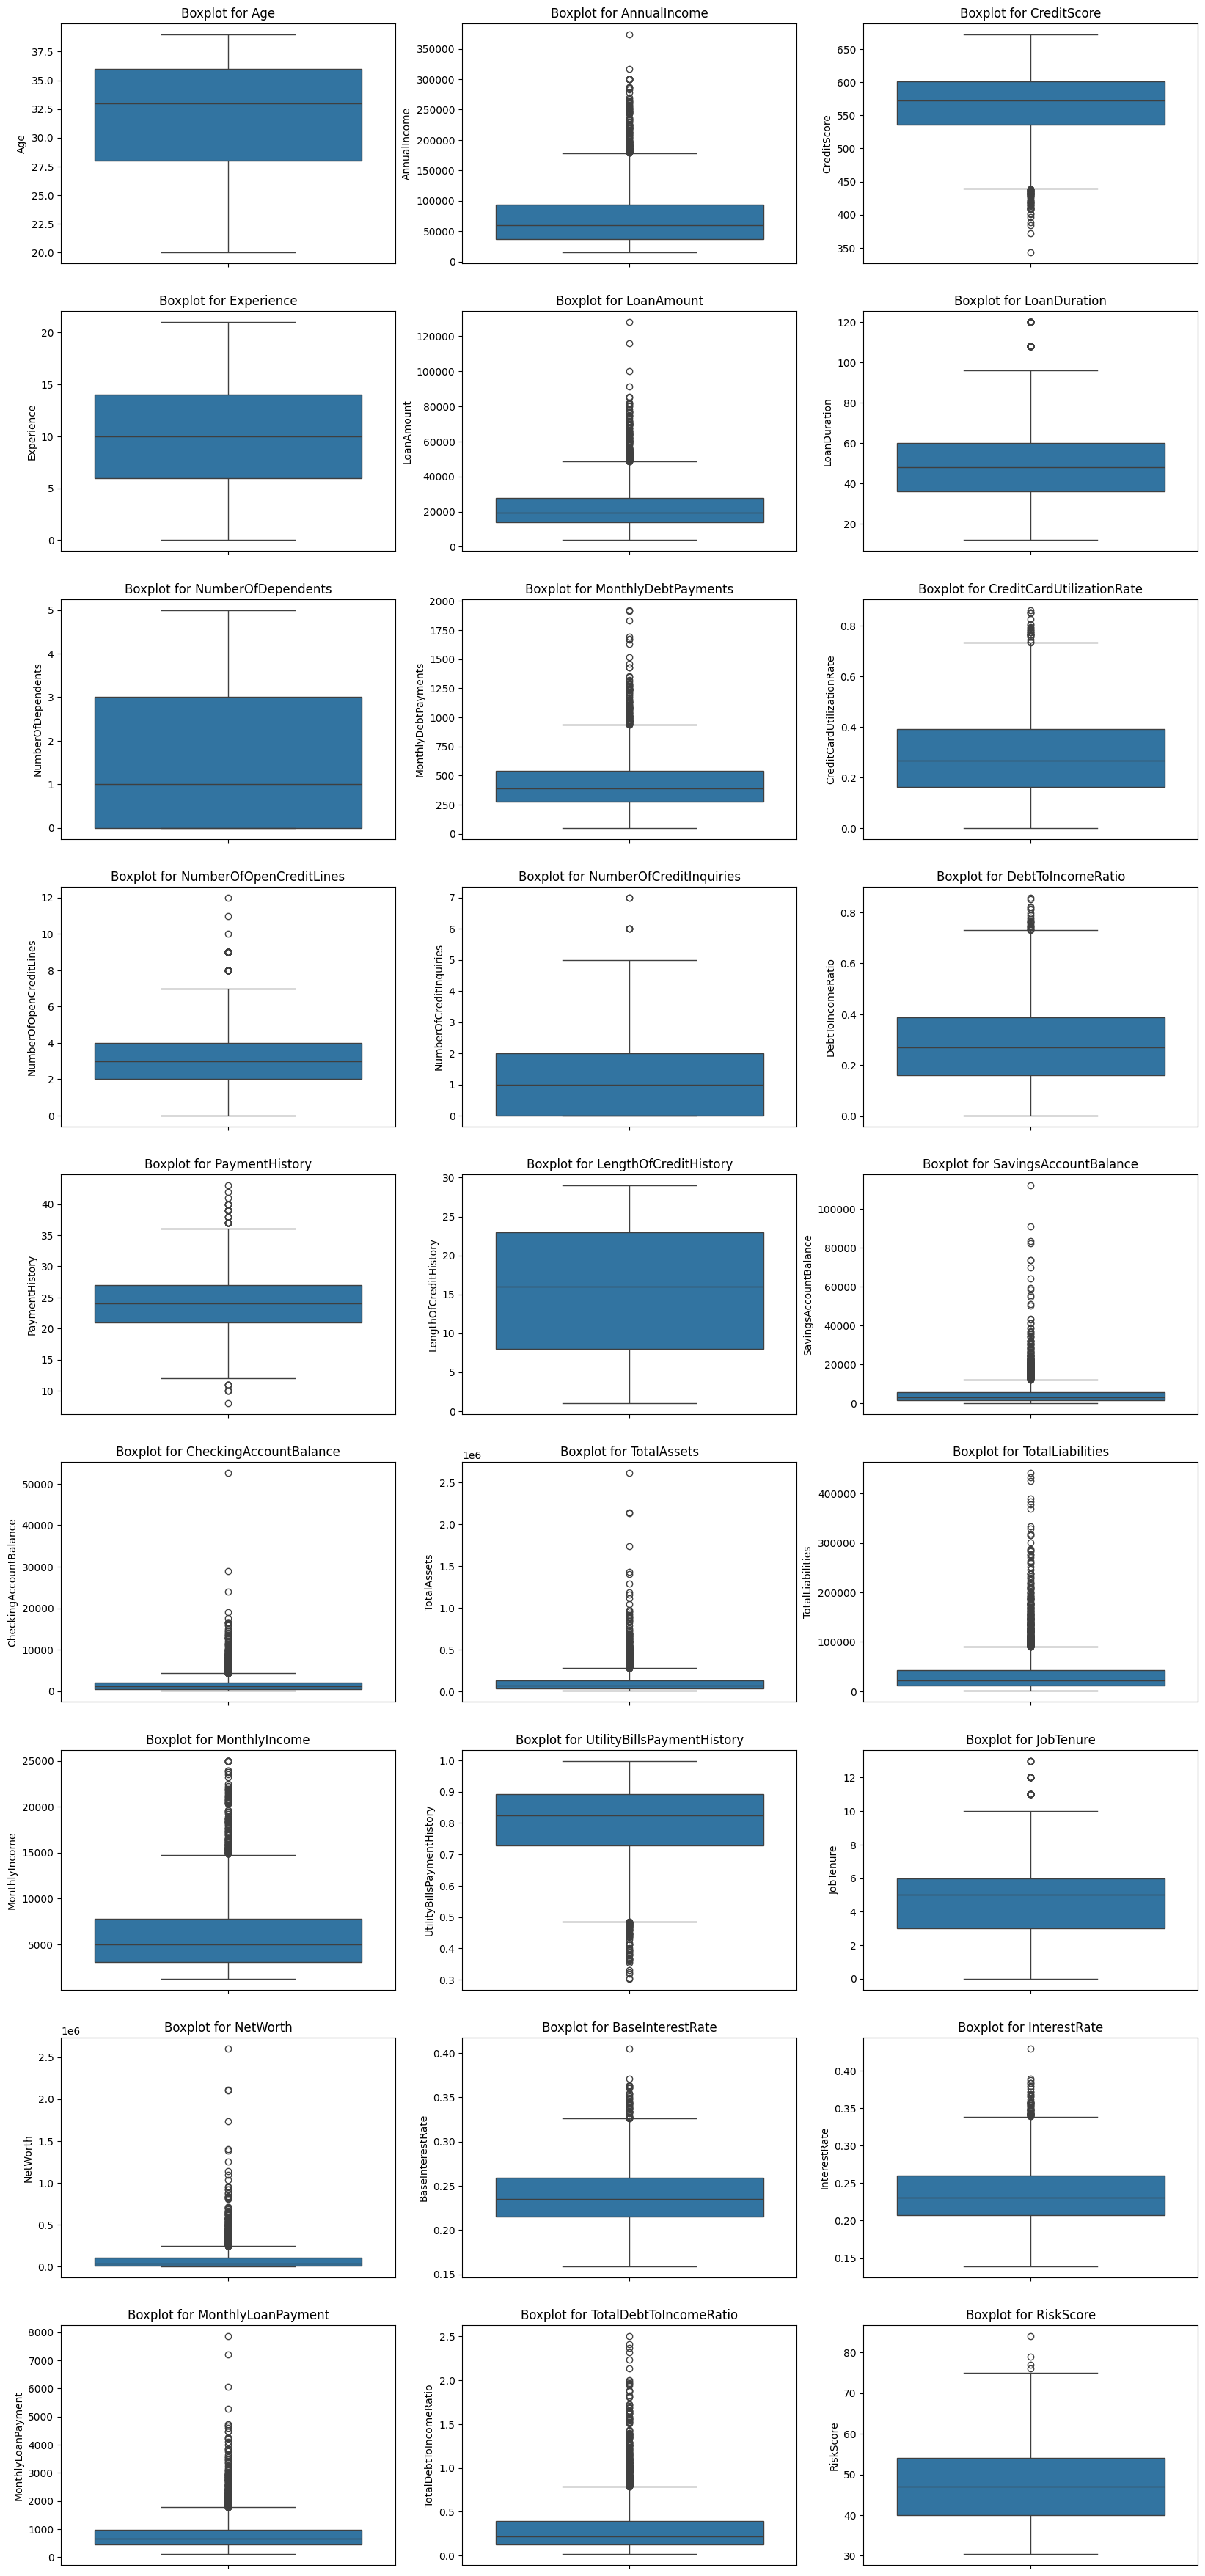

In [31]:
# Number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(numerical_features) + plots_per_row - 1) // plots_per_row

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))

# Iterate through the numerical columns and create the distribution plots
for i, col in enumerate(numerical_features):
  row_idx = i // plots_per_row
  col_idx = i % plots_per_row

  sns.boxplot(df[col] , ax=axes[row_idx, col_idx])
  axes[row_idx, col_idx].set_title(f'Boxplot for {col}')

plt.show()

In [32]:
print(df.describe(include="all"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                Age   AnnualIncome  CreditScore EmploymentStatus  \
count   3474.000000    3474.000000  3474.000000             3474   
unique          NaN            NaN          NaN                3   
top             NaN            NaN          NaN         Employed   
freq            NaN            NaN          NaN             2966   
mean      32.009211   71304.924007   564.546344              NaN   
std        5.130143   46941.516659    48.030005              NaN   
min       20.000000   15000.000000   343.000000              NaN   
25%       28.000000   36757.500000   536.000000              NaN   
50%       33.000000   60166.500000   572.000000              NaN   
75%       36.000000   93670.250000   601.000000              NaN   
max       39.000000  373724.000000   672.000000              NaN   

       EducationLevel   Experience     LoanAmount  LoanDuration MaritalStatus  \
count            3474  3474.000000    3474.000000   3474.000000          3474   
unique              5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


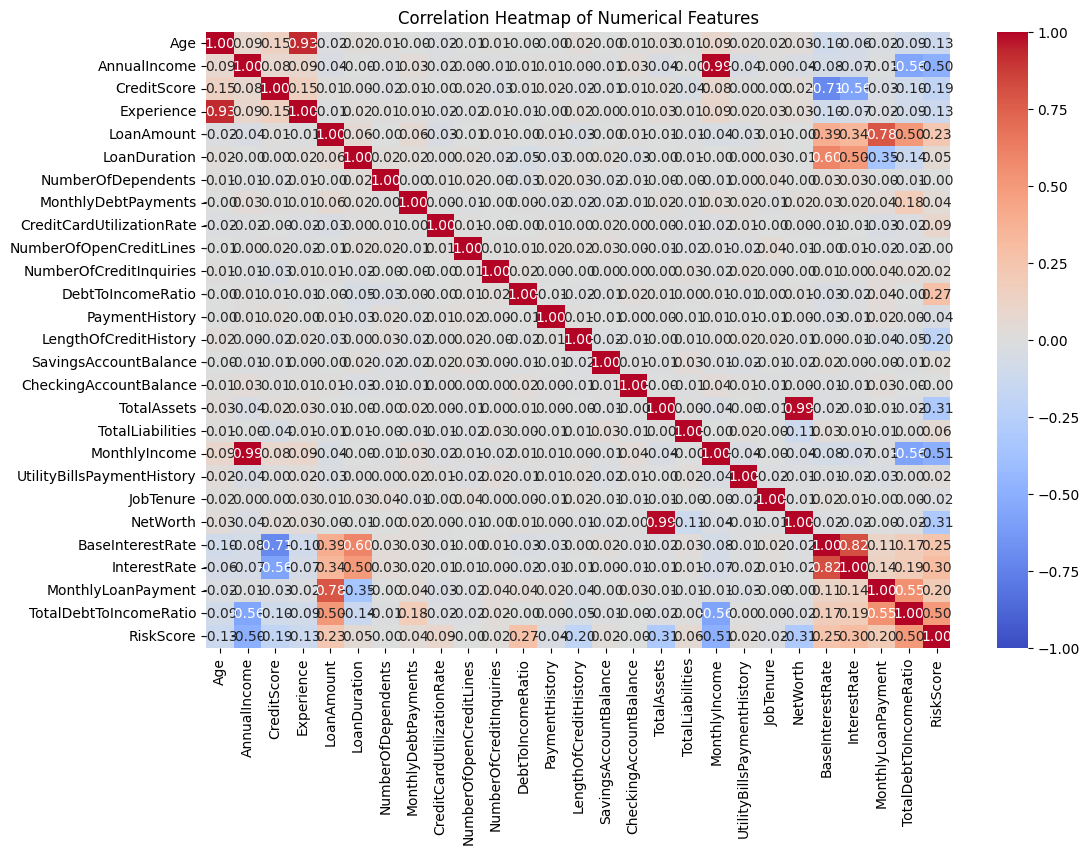

In [39]:
# 상관 관계 히트맵
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

** 양의 상관관계 분석
* Age - experience 상관관계 0.93으로 높음. Age만 사용
* 연소득 - 월소득 상관관계 0.99로 당연히 높음. 연소득만 사용
* 순자산 - 총자산 상관관계 0.99로 당연히 높음. 총자산보다는 순자산 변수가 더 좋을 듯
* 대출금액 - 월별 대출 상환액 상관관계 0.78로 당연히 높음. 많이 빌렸으면 그만큼 갚게 되는 것. 대출금액(Loanamount) 변수가 좋을 듯.
* 기본 금리 - 적용된 금리 상관관계 0.82로 높음. 이것도 당연한 결과 둘의 큰 차이는 없을 거라고 생각.
  * 적용된 금리를 사용하는 게 맞지 않을까라는 생각. 대출상품 별 금리가 다를테니
* 대출상환기간 - 기본/적용된 금리 상관관계 0.6/0.5
  * 장기 대출은 리스크가 높기에 금리가 높게 설정되는 경향
  * 단기 대출은 리스크가 낮기에 금리가 낮게 설정되는 경향



** 음의 상관관계 분석
* Creditscore - 금리 상관관계 -0.75,-0.5로 높음
  * 높은 신용 점수 → 대출자가 신용이 좋음 → 대출 상환 가능성 높음 → 금리 낮음
  * 낮은 신용 점수 → 대출자가 신용이 낮음 → 대출 상환 가능성 낮음 → 금리 높음




## 변수 중요도 분석
- t-test
- ANOVA

In [40]:
## T-test
from scipy.stats import ttest_ind

# LoanApproved에 따른 그룹화
approved = df[df['LoanApproved'] == 'Approved']
not_approved = df[df['LoanApproved'] == 'NotApproved']

# 각 수치형 변수에 대해 T-Test 수행
for col in numerical_features:
    t_stat, p_val = ttest_ind(approved[col], not_approved[col], equal_var=False)
    print(f"Variable: {col}, T-Statistic: {t_stat:.3f}, P-Value: {p_val:.3e}")


Variable: Age, T-Statistic: 7.324, P-Value: 2.984e-13
Variable: AnnualIncome, T-Statistic: 42.625, P-Value: 1.430e-299
Variable: CreditScore, T-Statistic: 7.393, P-Value: 1.787e-13
Variable: Experience, T-Statistic: 7.049, P-Value: 2.169e-12
Variable: LoanAmount, T-Statistic: -20.322, P-Value: 9.899e-86
Variable: LoanDuration, T-Statistic: -6.657, P-Value: 3.236e-11
Variable: NumberOfDependents, T-Statistic: -0.445, P-Value: 6.563e-01
Variable: MonthlyDebtPayments, T-Statistic: -3.745, P-Value: 1.832e-04
Variable: CreditCardUtilizationRate, T-Statistic: -0.401, P-Value: 6.882e-01
Variable: NumberOfOpenCreditLines, T-Statistic: 0.068, P-Value: 9.457e-01
Variable: NumberOfCreditInquiries, T-Statistic: -0.888, P-Value: 3.744e-01
Variable: DebtToIncomeRatio, T-Statistic: 1.005, P-Value: 3.148e-01
Variable: PaymentHistory, T-Statistic: 2.900, P-Value: 3.750e-03
Variable: LengthOfCreditHistory, T-Statistic: 9.061, P-Value: 2.116e-19
Variable: SavingsAccountBalance, T-Statistic: -0.030, P-Val

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* t-test 결과 해석 : LoanApproved가 "Approved"인 그룹과 "NotApproved"인 그룹 간에 평균 차이가 있는지를 검정, p-value<=0.05이면 두 그룹 간 유의미한 차이

* 유의미한 차이가 있는 변수: Age, AnnualIncome, CreditScore, Experience, LoanAmount, LoanDuration, PaymentHistory, LengthOfCreditHistory, TotalAssets, MonthlyIncome, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, RiskScore 등은 대출 승인 여부와 강한 관계가 있다.

In [41]:
## ANOVA - 다중 범주형 변수에 따른 RiskScore 차이를 분석

from scipy.stats import f_oneway

# LoanApproved 제외한 범주형 변수들
categorical_features = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus',
                        'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults']

# 각 수치형 변수에 대해 ANOVA 수행
for col in categorical_features:
    groups = [df[df[col] == category]['Age'] for category in df[col].unique()]  # 각 범주에 대한 Age 그룹화
    f_stat, p_val = f_oneway(*groups)
    print(f"Variable: {col}, F-Statistic: {f_stat:.3f}, P-Value: {p_val:.3e}")

    # 수치형 변수들에 대해 같은 방식으로 반복
    numerical_features = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration',
                          'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
                          'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio',
                          'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance',
                          'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
                          'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate',
                          'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore']

    for numerical_col in numerical_features:
        groups = [df[df[col] == category][numerical_col] for category in df[col].unique()]  # 각 범주에 대해 수치형 변수 그룹화
        f_stat, p_val = f_oneway(*groups)
        print(f"Variable: {numerical_col} by {col}, F-Statistic: {f_stat:.3f}, P-Value: {p_val:.3e}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Variable: EmploymentStatus, F-Statistic: 3.345, P-Value: 3.539e-02
Variable: Age by EmploymentStatus, F-Statistic: 3.345, P-Value: 3.539e-02
Variable: AnnualIncome by EmploymentStatus, F-Statistic: 3.605, P-Value: 2.729e-02
Variable: CreditScore by EmploymentStatus, F-Statistic: 0.385, P-Value: 6.808e-01
Variable: Experience by EmploymentStatus, F-Statistic: 2.402, P-Value: 9.069e-02
Variable: LoanAmount by EmploymentStatus, F-Statistic: 0.392, P-Value: 6.757e-01
Variable: LoanDuration by EmploymentStatus, F-Statistic: 0.246, P-Value: 7.818e-01
Variable: NumberOfDependents by EmploymentStatus, F-Statistic: 0.160, P-Value: 8.523e-01
Variable: MonthlyDebtPayments by EmploymentStatus, F-Statistic: 0.075, P-Value: 9.277e-01
Variable: CreditCardUtilizationRate by EmploymentStatus, F-Statistic: 0.004, P-Value: 9.964e-01
Variable: NumberOfOpenCreditLines by EmploymentStatus, F-Statistic: 0.480, P-Value: 6.187e-01
Variable: NumberOfCreditInquiries by EmploymentStatus, F-Statistic: 0.079, P-Val

** F-검정(F-statistic)과 p-값(P-value)의 해석:

F-통계량(F-statistic): F-검정은 두 개 이상의 그룹 간의 분산 차이를 비교하는 통계량입니다. F-통계량 값이 클수록 그룹 간 차이가 크다는 의미



예시 분석:

- EmploymentStatus (고용 상태)와 다른 변수들:

Age by EmploymentStatus: F-통계량 3.345, p-값 0.03539 → 고용 상태와 나이 간의 관계가 유의미합니다.

AnnualIncome by EmploymentStatus: F-통계량 3.605, p-값 0.02729 → 고용 상태와 연소득 간의 관계가 유의미합니다.

CreditScore by EmploymentStatus: F-통계량 0.385, p-값 0.6808 → 고용 상태와 신용 점수 간의 관계는 유의미하지 않음.

RiskScore by EmploymentStatus: F-통계량 42.231, p-값 7.566e-19 → 고용 상태와 리스크 점수 간의 관계는 매우 유의미함.

- EducationLevel (교육 수준)과 다른 변수들:

AnnualIncome by EducationLevel: F-통계량 23.675, p-값 2.426e-19 → 교육 수준과 연소득 간의 관계가 매우 유의미합니다.

CreditScore by EducationLevel: F-통계량 61.301, p-값 4.119e-50 → 교육 수준과 신용 점수 간의 관계가 매우 유의미함.

RiskScore by EducationLevel: F-통계량 39.081, p-값 4.754e-32 → 교육 수준과 리스크 점수 간의 관계도 매우 유의미합니다.

- MaritalStatus (결혼 상태)와 다른 변수들:

LoanAmount by MaritalStatus: F-통계량 3.334, p-값 0.01867 → 결혼 상태와 대출 금액 간의 관계가 유의미함.

MonthlyLoanPayment by MaritalStatus: F-통계량 3.309, p-값 0.01932 → 결혼 상태와 월별 대출 상환금 간의 관계가 유의미함.

TotalDebtToIncomeRatio by MaritalStatus: F-통계량 4.157, p-값 0.005993 → 결혼 상태와 총 부채 상환 비율 간의 관계가 유의미함.

- HomeOwnershipStatus (주택 소유 여부)와 다른 변수들:

CreditScore by HomeOwnershipStatus: F-통계량 3.443, p-값 0.01607 → 주택 소유 여부와 신용 점수 간의 관계가 유의미합니다.

LoanAmount by HomeOwnershipStatus: F-통계량 1.413, p-값 0.237 → 주택 소유 여부와 대출 금액 간의 관계는 유의미하지 않음.


- F-검정의 주요 결과 해석:
유의미한 변수들: p-값이 0.05 이하인 변수들 (예: 고용 상태와 리스크 점수, 교육 수준과 연소득 등)은 두 범주 간의 차이가 통계적으로 유의미하다는 것을 의미합니다.

유의미하지 않은 변수들: p-값이 0.05 이상인 변수들 (예: 고용 상태와 신용 점수, 결혼 상태와 신용 점수 등)은 두 범주 간의 차이가 통계적으로 유의미하지 않음을 나타냅니다.

## Clustering

In [44]:
# 수치형 변수만을 사용해 군집화하고, 클러스터별 분포를 확인
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 수치형 변수 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 클러스터별 통계량 확인
df.groupby('Cluster')[numerical_features].mean()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
Cluster,,,,,,,,,,,,,,,,,,,,,
0,33.398414,99039.975595,582.297743,11.124466,19029.108603,48.849298,1.584503,420.154973,0.281549,3.023185,...,33453.020744,8198.122483,0.794559,5.075656,118852.635754,0.223588,0.217970,696.954914,0.164827,41.065040
1,31.957447,43855.598109,548.780142,9.713948,44694.078014,51.035461,1.628842,469.477541,0.281192,3.014184,...,35299.075650,3609.135934,0.789603,5.120567,63898.541371,0.267834,0.269203,1805.310662,0.832819,54.683215
2,30.412181,47334.184136,548.664306,8.000000,19348.580028,57.127479,1.574363,432.672805,0.293721,3.041785,...,37703.220963,3928.645420,0.809224,4.913598,55994.692635,0.247623,0.245746,649.367244,0.347426,52.896034


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


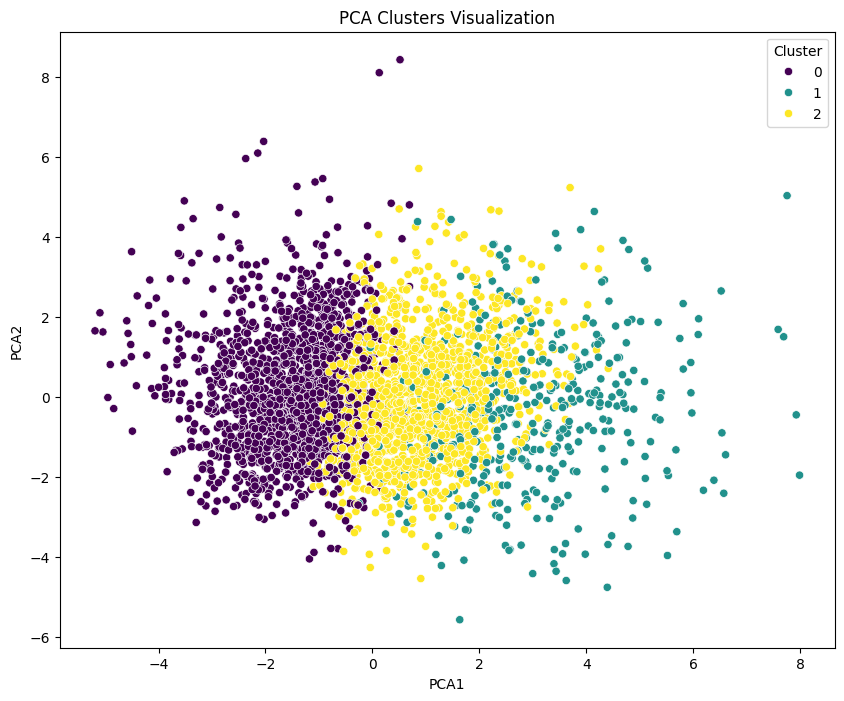

In [45]:
from sklearn.decomposition import PCA

# PCA로 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('PCA Clusters Visualization')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


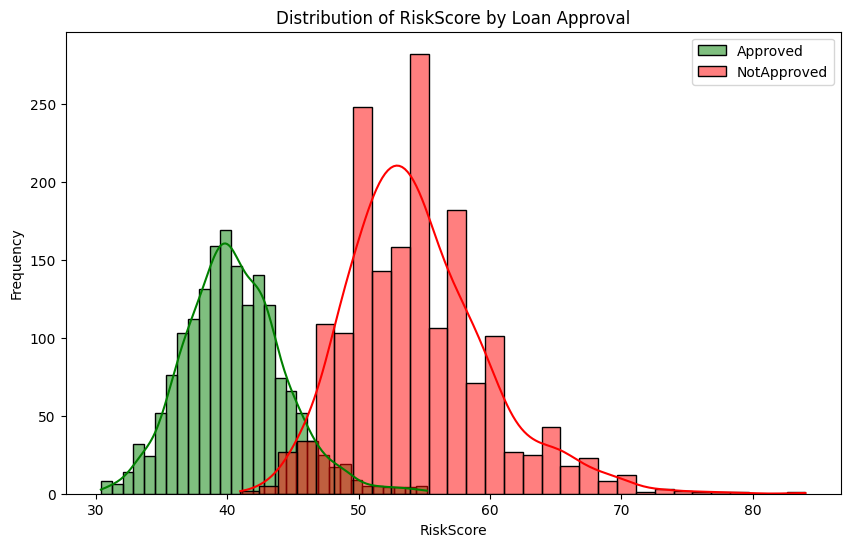

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 대출 승인 여부에 따른 RiskScore 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df[df['LoanApproved'] == 'Approved']['RiskScore'], color='green', label='Approved', kde=True, bins=30)
sns.histplot(df[df['LoanApproved'] == 'NotApproved']['RiskScore'], color='red', label='NotApproved', kde=True, bins=30)
plt.title('Distribution of RiskScore by Loan Approval')
plt.xlabel('RiskScore')
plt.ylabel('Frequency')
plt.legend()
plt.show()

* RiskScore가 높을 수록 대출 미승인됨.

****************************************
- min Q1 Q2 Q3 max
- 30   40  47  54  84
****************************************

- **30 - 40**: 매우 낮은 리스크 (우수한 대출자)
- **40 - 50**: 낮은 리스크 (상환 능력 양호)
- **50 - 60**: 중간 리스크 (상환 가능성 보통)
- **60 - 85**: 높은 리스크 (상환 능력 낮음, 대출 승인 거부 가능)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


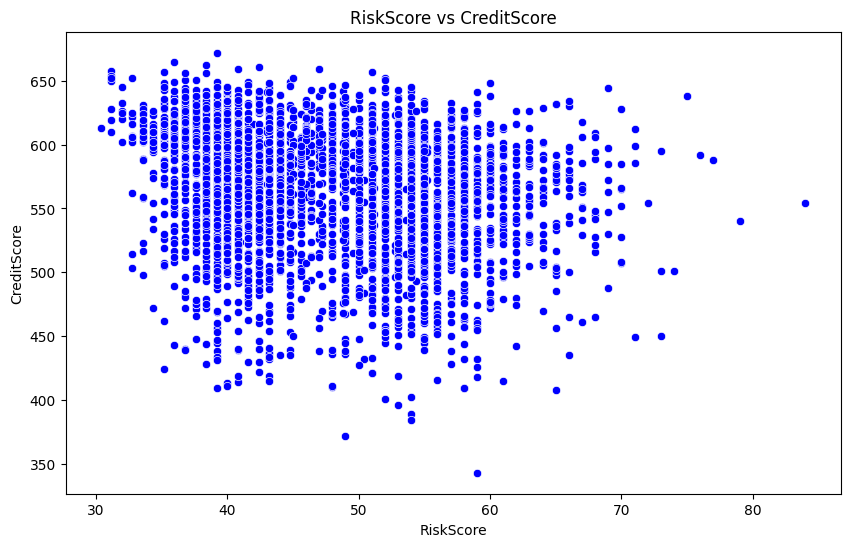

In [50]:
# RiskScore와 CreditScore 간의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RiskScore', y='CreditScore', data=df, color='blue')
plt.title('RiskScore vs CreditScore')
plt.xlabel('RiskScore')
plt.ylabel('CreditScore')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


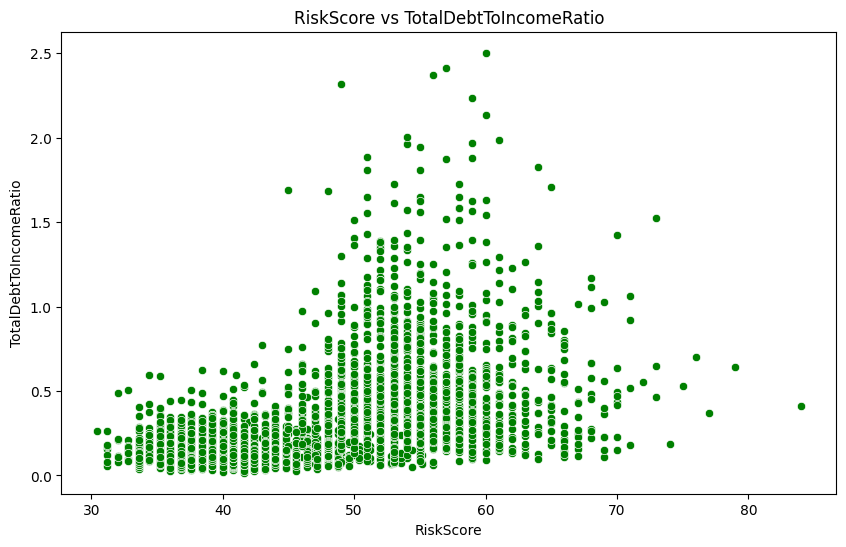

In [51]:
# RiskScore와 TotalDebtToIncomeRatio 간의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RiskScore', y='TotalDebtToIncomeRatio', data=df, color='green')
plt.title('RiskScore vs TotalDebtToIncomeRatio')
plt.xlabel('RiskScore')
plt.ylabel('TotalDebtToIncomeRatio')
plt.show()

#### 결론 : 연관분석 + EDA를 통한 나의 생각

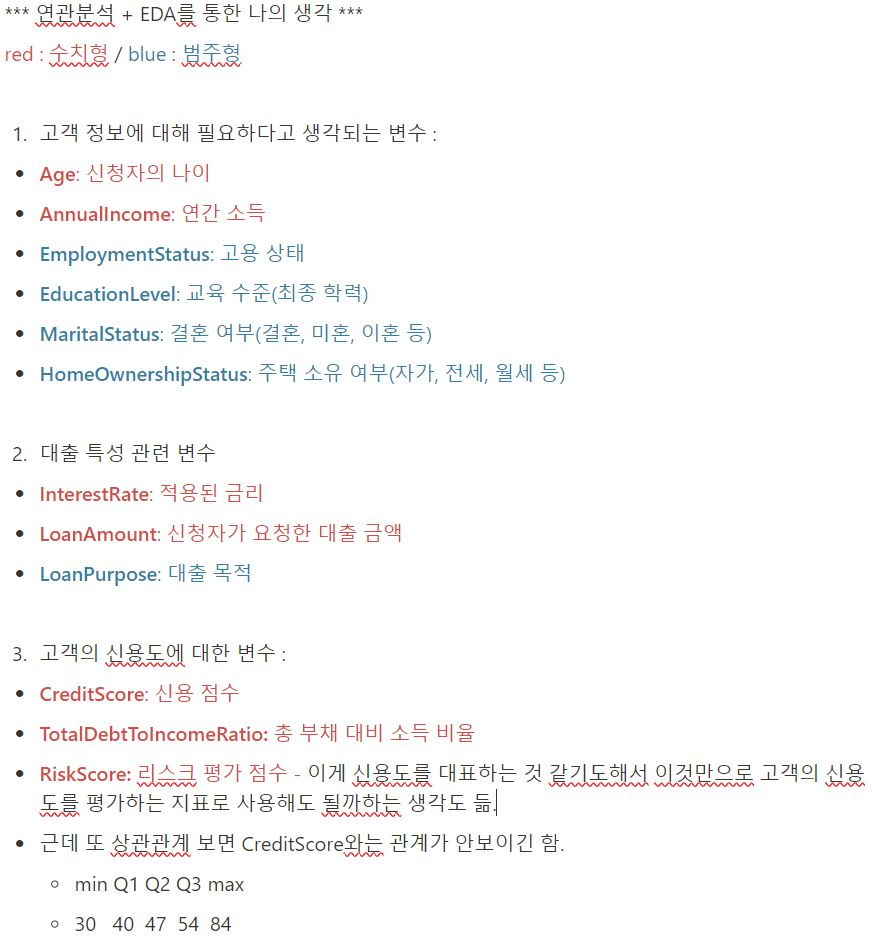